In [ ]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/ozone/ozone.csv")
df.head()

In [ ]:
train_cols = df.columns[1:4]
X = df[train_cols]
y = df['Result']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp,y_samp], axis=1)

X = X_samp[train_cols]
y = y_samp['Result']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=7)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
# X_train_scaled = X_train
# X_test_scaled = X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
hist = model.fit(X_train_scaled, y_train, epochs=200)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [ ]:
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

In [ ]:
import numpy as np

test_set = np.array([25, 10.8, 71]).reshape(1,3)
print(model.predict(test_set))

test_set = np.array([255, 4.3, 90]).reshape(1,3)
print(model.predict(test_set))

In [ ]:
test_set = scaler.transform([[25, 10.8, 71]])
print(model.predict(test_set))
test_set = scaler.transform([[255, 4.3, 90]])
print(model.predict(test_set))

In [ ]:
#144페이지 손글씨 데이터셋

In [ ]:
# 종속변수 이진분류는 sigmoid
# 종속변수 다분류는 softmax

In [ ]:
from tensorflow.keras import datasets
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

y_train = np_utils.to_categorical(y_train) # 원핫인코딩
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape # 3차원 (60000, 28, 28)이 나옴

X_train = X_train.reshape(-1, W*H) # 3차원을 2차원으로. 28*28=784
X_test = X_test.reshape(-1, W*H)
X_train = X_train / 255.0 # 0.0에서 1.0 사이의 값이 나오도록 /255.0. 일종의 정규화
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.models import Sequential

def make_model(input_number, layers, output_number):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,), name='Hidden-1'))
    model.add(Dense(layers[1], activation='relu', name='Hidden-2'))
    model.add(Dense(layers[2], activation='relu', name='Hidden-3'))
    model.add(Dropout(0.2)) # 드롭아웃 계층. 랜덤으로 20%의 출력을 off시킴으로써 학습의 과적합 방지
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
input_number = 784 # 이미지는 픽셀 하나가 변수 하나. 784픽셀이기 때문에 입력 노드수 784
hidden_layers = [128, 64, 32]
number_of_class = 10 # 0에서 9까지 10개의 값
output_number = number_of_class

model = make_model(input_number, hidden_layers, output_number)

In [ ]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

In [ ]:
performance_test = model.evaluate(X_test, y_test, batch_size=100)
performance_test

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [ ]:
model.summary()

In [ ]:
# 166페이지 놀이기구 만족도 분류

In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/rides/rides2.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


In [2]:
train_cols = df.columns[:7]
X = df[train_cols]
y = df["overall"]

In [3]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['overall'])
df_samp = pd.concat([X_samp,y_samp], axis=1)

X = df_samp[train_cols]
y = df_samp["overall"]

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
from tensorflow.keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.models import Sequential

def make_model(input_number, layers, output_number):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,), name='Input'))
    model.add(Dense(layers[1], activation='relu', name='Hidden-1'))
    model.add(Dense(layers[2], activation='relu', name='Hidden-2'))
    # model.add(Dropout(0.2)) 이번 건 드롭아웃 있으면 오히려 정확도가 떨어진대
    model.add(Dense(output_number, activation='sigmoid', name='output'))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
model = make_model(len(X_train.columns),[128, 64, 32], 1)

2021-12-28 10:54:04.160101: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot:>

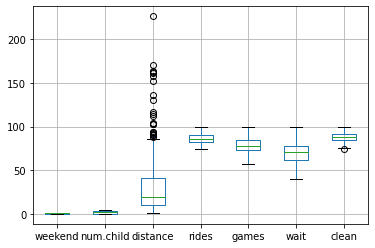

In [7]:
X_train.boxplot()

<AxesSubplot:>

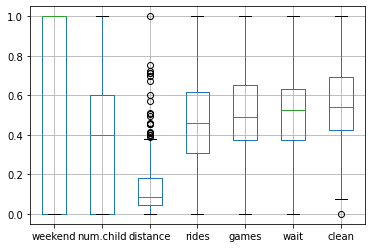

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

df3 = pd.DataFrame(X_train_scaled, columns=train_cols)
df3.boxplot()

In [9]:
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2477 - accuracy: 0.5893
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.7168
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.6888
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.7321
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.7321
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.7526
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.7577
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.7857
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.8163
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 0.7908
Epoch 11/

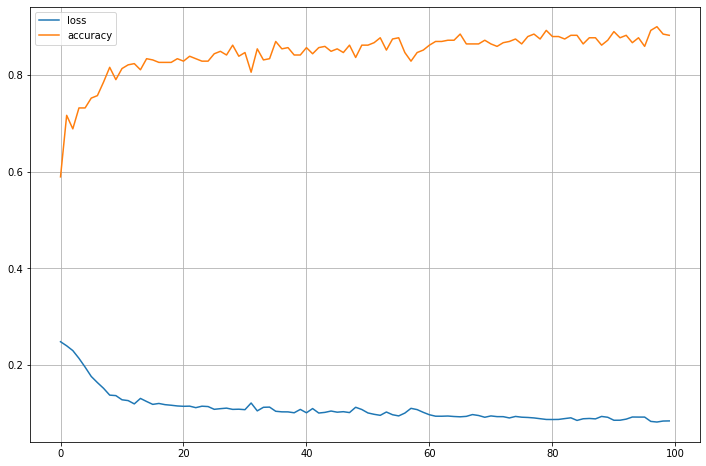

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [11]:
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9031
[0.07813979685306549, 0.9030612111091614]
accuracy: 90.31%
4/4 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.8571
[0.100105419754982, 0.8571428656578064]
accuracy: 85.71%


In [12]:
model.save("/Users/ian/Desktop/Study/data/rides/rides_keras.model")
model.save_weights("/Users/ian/Desktop/Study/data/rides/rides.weight")

2021-12-28 10:54:25.709930: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/ian/Desktop/Study/data/rides/rides_keras.model/assets


INFO:tensorflow:Assets written to: /Users/ian/Desktop/Study/data/rides/rides_keras.model/assets


In [13]:
pred = model.predict(X_test_scaled[:5])
pred

array([[4.82233793e-01],
       [3.70693624e-01],
       [5.44360280e-03],
       [1.02237135e-01],
       [2.19196081e-04]], dtype=float32)

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

test_set = np.array([0,2,20,84,78,67,89]).reshape(1,7)
test_set_scaled = scaler.transform(test_set)
print(model.predict(test_set_scaled))

test_set = np.array([1,0,10,90,78,67,89]).reshape(1,7)
test_set_scaled = scaler.transform(test_set)
print(model.predict(test_set_scaled))

[[0.75749683]]
[[0.03389841]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [15]:
import joblib

# scaler 백업
joblib.dump(scaler, "/Users/ian/Desktop/Study/data/rides/scaler.sav")

# scaler 복원
# scaler = joblib.load("/Users/ian/Desktop/Study/data/rides/scaler.sav")

['/Users/ian/Desktop/Study/data/rides/scaler.sav']